In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_MAIN = pd.read_csv("/Users/neelesh/Documents/FS-Sem2/fin_man/ESG-and-Financial-Performance/3) Data/main_df_no_NAN_99p.csv")
df_MAIN_cleaned = df_MAIN.dropna()
df_MAIN_cleaned.describe()

,Unnamed: 0,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Revenue - Mean,Earnings Per Share - Mean,Return On Equity - Mean,Volume,Company Market Cap,EBITDA - Mean
count,50736.000000,50736.00000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,5.073600e+04,50736.000000,50736.000000,5.073600e+04,5.073600e+04,5.073600e+04
mean,105943.495861,2014.95179,14.092822,45.176767,43.920164,92.278124,45.446937,50.942291,38.138041,3.252298e+11,94.246883,13.599591,1.164860e+06,3.290298e+11,4.537727e+10
std,59609.025312,4.98485,41.259729,19.707534,18.826651,20.426456,22.992075,21.653620,28.029774,1.564371e+12,715.321399,19.839521,4.793798e+06,1.664073e+12,2.360485e+11
min,2.000000,2002.00000,-76.348632,4.470837,4.470837,3.846154,1.611402,3.956835,0.000000,0.000000e+00,-92.500500,-129.960000,0.000000e+00,8.836997e+07,-5.121924e+08
25%,54743.750000,2011.00000,-11.440238,29.172295,28.908182,100.000000,26.996637,33.609719,12.249763,1.253814e+09,0.390475,6.599918,0.000000e+00,2.359950e+09,2.621201e+08
50%,106842.500000,2016.00000,9.430330,44.644679,43.401165,100.000000,44.240609,51.544241,37.116274,5.493699e+09,1.594085,12.002540,1.562000e+04,9.353239e+09,1.035209e+09
75%,156939.250000,2019.00000,32.696180,60.650268,58.300877,100.000000,63.518516,68.585440,61.739893,3.555839e+10,5.254563,19.373888,3.741870e+05,6.005076e+10,6.673981e+09
max,206912.000000,2022.00000,256.142197,89.721799,87.471019,100.000000,95.077388,94.714260,95.529762,2.770789e+13,15036.339140,182.646000,6.600124e+07,3.417197e+13,4.636861e+12


In [3]:
df_MAIN_cleaned.head(5)

,Unnamed: 0,ISIN,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,...,Return On Equity - Mean,Volume,Company Market Cap,EBITDA - Mean,Country of Headquarters,Region of Headquarters,TRBC Industry Name,TRBC Industry Group Name,TRBC Business Sector Name,TRBC Economic Sector Name
0,2,DK0010244508,2002,-4.703688,10.732601,10.732601,100.0,16.469428,16.153846,0.000000,...,18.19000,0.0,5.201496e+10,1.929737e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
1,3,DK0010244508,2003,78.725725,16.933543,16.933543,100.0,19.033531,34.523810,0.000000,...,17.60000,0.0,1.828570e+11,6.631311e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
2,4,DK0010244508,2004,6.899061,17.855846,17.855846,100.0,20.465337,26.862745,7.523148,...,20.58450,0.0,1.980218e+11,8.512478e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
3,5,DK0010244508,2005,45.463359,16.395483,16.395483,100.0,20.152244,17.166667,11.683007,...,19.76857,0.0,2.821975e+11,8.136144e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
4,6,DK0010244508,2006,-17.550102,18.732474,18.732474,60.0,20.633013,25.500000,11.033951,...,12.20555,0.0,2.292305e+11,9.496474e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials


In [4]:
#   Columns in df_MAIN_cleaned

#   ['Year',
#  'ISIN',
#  'Total Return',
#  'ESG Score',
#  'ESG Combined Score',
#  'ESG Controversies Score',
#  'Social Pillar Score',
#  'Governance Pillar Score',
#  'Environmental Pillar Score',
#  'Revenue - Mean',
#  'Earnings Per Share - Mean',
#  'Return On Equity - Mean',
#  'Volume',
#  'Company Market Cap',
#  'EBITDA - Mean',
#  'Country of Headquarters',
#  'Region of Headquarters',
#  'TRBC Industry Name',
#  'TRBC Industry Group Name',
#  'TRBC Business Sector Name',
#  'TRBC Economic Sector Name']

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_5114/2996985170.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


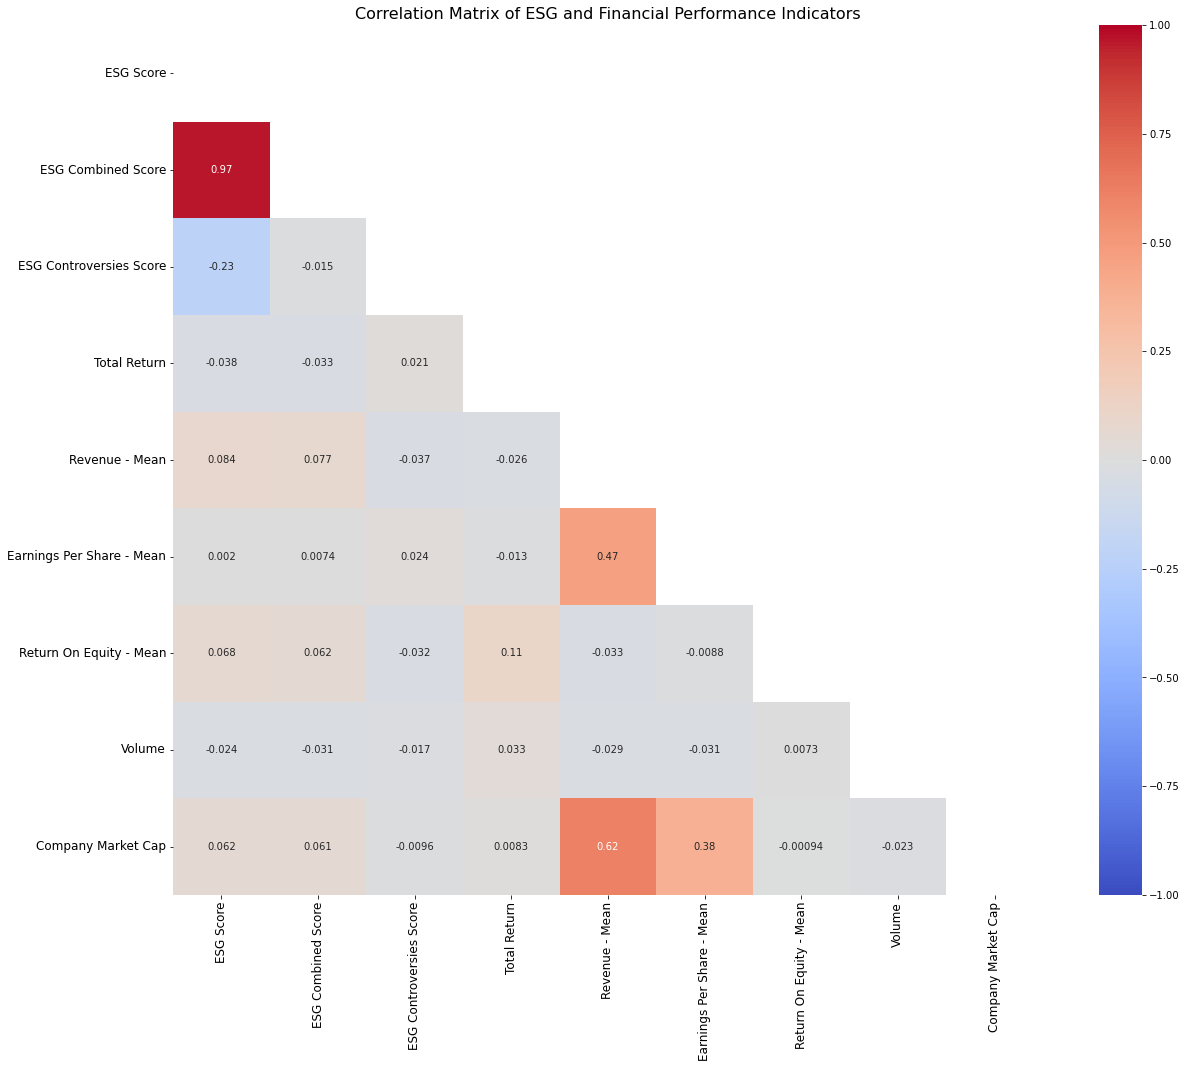

In [5]:
# Correlation matrix with both ESG and financial performance indicators [FOR ALL COMPANIES]
cols = ['ESG Score',
        'ESG Combined Score',
        'ESG Controversies Score',
        'Total Return',
        'Revenue - Mean',
        'Earnings Per Share - Mean',
        'Return On Equity - Mean',
        'Volume',
        'Company Market Cap']

df_selected = df_MAIN_cleaned[cols]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Create mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, ax=ax, vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix of ESG and Financial Performance Indicators', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

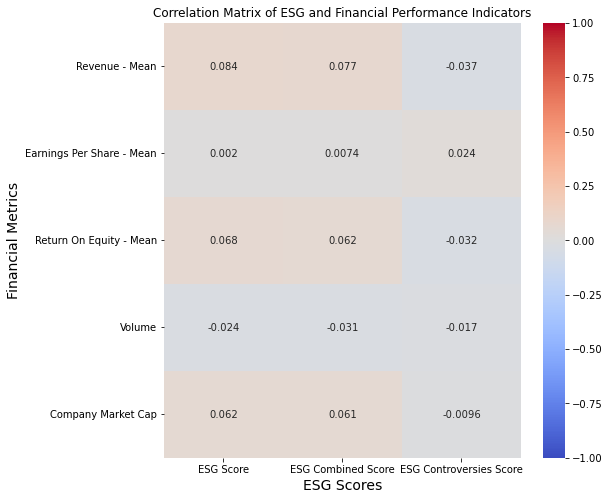

In [6]:
# Heatmap for the above correlation

# Select the columns of interest
cols = ['ESG Score', 'ESG Combined Score', 'ESG Controversies Score',
        'Revenue - Mean', 'Earnings Per Share - Mean', 'Return On Equity - Mean',
        'Volume', 'Company Market Cap']
df_selected = df_MAIN_cleaned[cols]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Extract the correlations between Financial Metrics and the three ESG scores
corr_matrix = corr_matrix.loc[['Revenue - Mean', 'Earnings Per Share - Mean',
                               'Return On Equity - Mean', 'Volume', 'Company Market Cap'],
                              ['ESG Score','ESG Combined Score','ESG Controversies Score']]

# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of ESG and Financial Performance Indicators')
plt.xlabel('ESG Scores', fontsize=14)
plt.ylabel('Financial Metrics', fontsize=14)
plt.show()

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_5114/2426515728.py:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


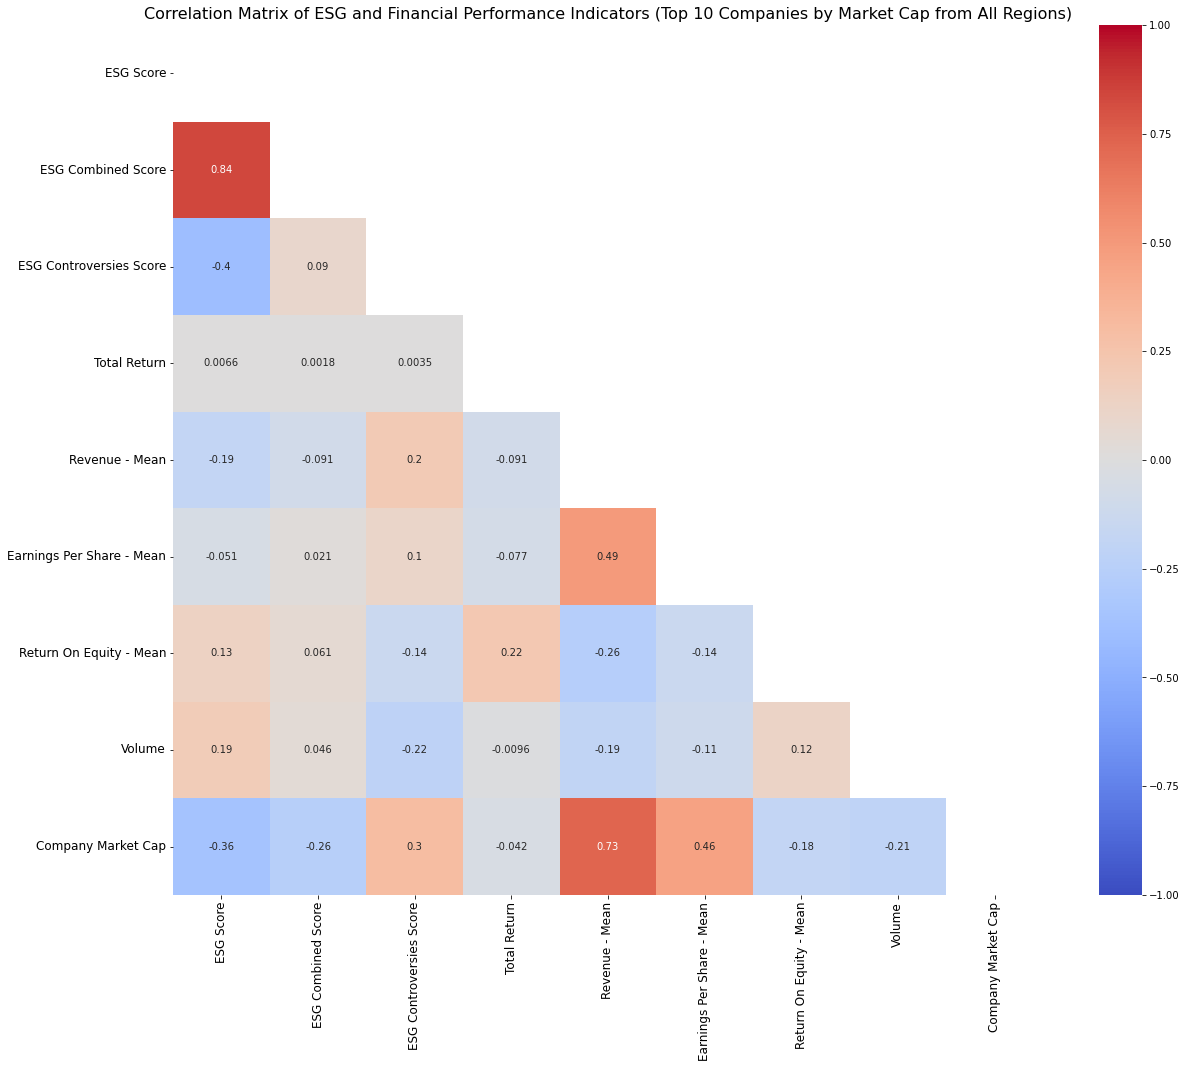

In [7]:
# Correlation matrix with both ESG and financial performance indicators 

# [FOR TOP-10 MARKET-CAP COMPANIES IN ALL REGIONS]



# Filter top 10 companies by market cap from all regions
top_n_df_intermediate = df_MAIN_cleaned.groupby('Region of Headquarters') \
            .apply(lambda x: x.groupby('ISIN') \
            .agg({'Company Market Cap': 'mean'}) \
            .nlargest(10, 'Company Market Cap')) \
            .reset_index()
    
top_n_df = df_MAIN_cleaned.merge(top_n_df_intermediate['ISIN'], on='ISIN', how='inner')


cols = ['ESG Score',
        'ESG Combined Score',
        'ESG Controversies Score',
        'Total Return',
        'Revenue - Mean',
        'Earnings Per Share - Mean',
        'Return On Equity - Mean',
        'Volume',
        'Company Market Cap']

df_selected = top_n_df[cols]

corr_matrix = df_selected.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, ax=ax, vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix of ESG and Financial Performance Indicators (Top 10 Companies by Market Cap from All Regions)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

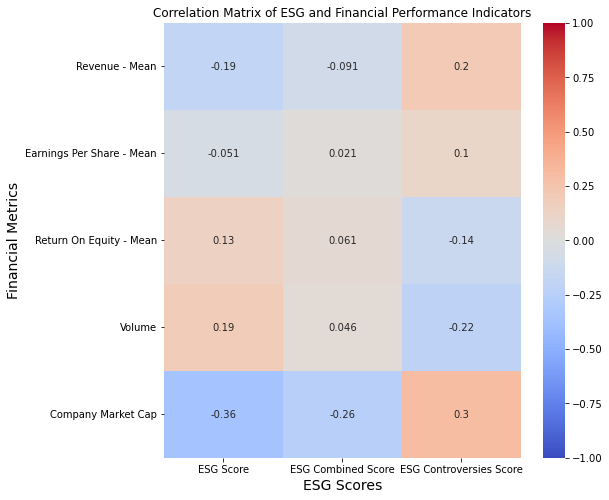

In [8]:
# Heatmap for the above correlation

# [FOR TOP-10 MARKET-CAP COMPANIES IN ALL REGIONS]

# Filter top 10 companies by market cap from all regions
top_n_df_intermediate = df_MAIN_cleaned.groupby('Region of Headquarters') \
            .apply(lambda x: x.groupby('ISIN') \
            .agg({'Company Market Cap': 'mean'}) \
            .nlargest(10, 'Company Market Cap')) \
            .reset_index()
    
top_n_df = df_MAIN_cleaned.merge(top_n_df_intermediate['ISIN'], on='ISIN', how='inner')

# Select the columns of interest
cols = ['ESG Score', 'ESG Combined Score', 'ESG Controversies Score',
        'Revenue - Mean', 'Earnings Per Share - Mean', 'Return On Equity - Mean',
        'Volume', 'Company Market Cap']
df_selected = top_n_df[cols]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Extract the correlations between Financial Metrics and the three ESG scores
corr_matrix = corr_matrix.loc[['Revenue - Mean', 'Earnings Per Share - Mean',
                               'Return On Equity - Mean', 'Volume', 'Company Market Cap'],
                              ['ESG Score','ESG Combined Score','ESG Controversies Score']]

# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of ESG and Financial Performance Indicators')
plt.xlabel('ESG Scores', fontsize=14)
plt.ylabel('Financial Metrics', fontsize=14)
plt.show()


In [9]:
# Function for "Fititng Random Forest Regression on Financial features to model ESG scores"

# For TOP MARKET-CAP COMPANIES IN ALL REGIONS

def model_ESG(n, conditioning_feature):
    
    results = pd.DataFrame({'number': n, 'mse': [0]*len(n), 'r2': [0]*len(n)})
    for i in range (len(n)):
        results['number'][i] = n[i]

        top_n_df_intermediate = df_MAIN_cleaned.groupby('Region of Headquarters') \
            .apply(lambda x: x.groupby('ISIN') \
            .agg({conditioning_feature: 'mean'}) \
            .nlargest(n[i], conditioning_feature)) \
            .reset_index()
    
        top_n_df = df_MAIN_cleaned.merge(top_n_df_intermediate['ISIN'], on='ISIN', how='inner')

        top_n_df_reg = top_n_df[['Total Return',
                             'Revenue - Mean',
                             'Earnings Per Share - Mean',
                             'Return On Equity - Mean',
                             'Volume',
                             'Company Market Cap',
                             'EBITDA - Mean',
                             'ESG Score']]
        X = top_n_df_reg.drop('ESG Score',axis =1)
        y = top_n_df_reg['ESG Score']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
        regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
        regr.fit(X_train, y_train.values.ravel())
        predictions = regr.predict(X_test)
        # Mean squared error (MSE)
        results['mse'][i] = mean_squared_error(y_test.values.ravel(), predictions)
        # R-squared scores
        results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
        
    return results
    

In [10]:
# Running RF regression on TOP-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
conditioning_feature = 'Return On Equity - Mean'

results_ = model_ESG(n, conditioning_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_5114/2627722533.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_5114/2627722533.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_5114/2627722533.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,238.916617,0.470535
1,6,192.261998,0.527567
2,7,133.700404,0.604194
3,8,158.484848,0.560219
4,9,286.547731,0.320958
5,10,150.500849,0.616437
6,11,149.553816,0.620437
7,12,134.729473,0.617597
8,13,160.506620,0.371788
9,14,220.502939,0.374458
